# TP -  Introduction to Pytorch


## Tensors, Back-propagation, Hand-written digit recognition,  Language modeling
*************************************************************

**Recommended Reading:**

http://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html

## Tensors

In [3]:
import torch

a = torch.FloatTensor(2, 2)
print(a)
print(a.mean())


 0.0000e+00 -1.5846e+29
-8.2054e+18  3.6902e+19
[torch.FloatTensor of size 2x2]

-3.961408124995789e+28


### are Numpy arrays inside

In [2]:
a = a.numpy()
a [0, 1] = 0

print(a)

[[  0.00000000e+00   0.00000000e+00]
 [  1.28334229e-20  -3.69024602e+19]]


## Variables

In [4]:
from torch.autograd import Variable

x = Variable(torch.ones(2, 2))
print(x)
print(x.mean())

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

Variable containing:
 1
[torch.FloatTensor of size 1]



In [22]:
x=torch.LongTensor(0)

In [23]:
x

[torch.LongTensor with no dimension]

In [18]:
y=Variable(torch.ones(1,1))
z=Variable(torch.ones(1,1))
y==z
t= Variable(torch.zeros(1,1))

In [19]:
y==z

Variable containing:
 1
[torch.ByteTensor of size 1x1]

In [20]:
y-z==t

Variable containing:
 1
[torch.ByteTensor of size 1x1]

In [21]:
def Criterion(x,y):
    return 1 if x-y is t else 0
Criterion(y,z)

0

### are Tensors inside

In [4]:
print(x.data)


 1  1
 1  1
[torch.FloatTensor of size 2x2]



### with automatic differentiation !

In [58]:
x.requires_grad=True

y = x + 2
print(y.grad_fn)

z = y * y * 3
print(z.grad_fn)

In [59]:
print(x.grad)

error = (10 - z).mean()
error.backward()

#print(error.grad)

Variable containing:
-4.5000 -4.5000
-4.5000 -4.5000
[torch.FloatTensor of size 2x2]



# Back-propagation: example

On calcule les gradients $\frac{\partial L(y - h(x))}{\partial w}$ et $\frac{\partial L(y - h(x))}{\partial b}$, avec:
 - $h(x) = \sigma(w*x + b)$
 - $\sigma$ est la fonction logistique (sigmoid)
 - $L(y, \hat{y}) = (y - \hat{y})^2$ (erreur quadratique)
 - $y = 0.2$
 - $x = 1.5$
 - $b = -2$
 - $w = 3$

In [5]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)
h = torch.sigmoid(w * x + b)
error = (y - h)**2
error.backward()

print(h.data[0])
print(w.grad.data[0])
print(b.grad.data[0])

0.9241418242454529
0.1522950828075409
0.101530060172081


In [6]:
error

Variable containing:
 0.5244
[torch.FloatTensor of size 1]

On minimize $L(y - h(x))$ pas à pas:

In [21]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)

alpha = 0.2
for i in range(100):
    h = torch.sigmoid(w * x + b)
    error = (y - h)**2
    error.backward()
    
    w.data.sub_(alpha * w.grad.data)
    w.grad.data.zero_()  # must reset to 0 before next pass
    
    b.data.sub_(alpha * b.grad.data)
    b.grad.data.zero_()  # must reset to 0 before next pass
    
    print('Epoch {} h={:.05f} w={:.05f} b={:.05f} error={:.05f}'.format(i+1, h.data[0], w.data[0], b.data[0], error.data[0]))

    

Epoch 1 h=0.92414 w=2.96954 b=-2.02031 error=0.52438
Epoch 2 h=0.91938 w=2.93755 b=-2.04163 error=0.51751
Epoch 3 h=0.91409 w=2.90391 b=-2.06406 error=0.50993
Epoch 4 h=0.90820 w=2.86848 b=-2.08768 error=0.50154
Epoch 5 h=0.90159 w=2.83113 b=-2.11258 error=0.49223
Epoch 6 h=0.89417 w=2.79172 b=-2.13886 error=0.48188
Epoch 7 h=0.88582 w=2.75010 b=-2.16660 error=0.47035
Epoch 8 h=0.87637 w=2.70613 b=-2.19591 error=0.45748
Epoch 9 h=0.86568 w=2.65968 b=-2.22688 error=0.44313
Epoch 10 h=0.85354 w=2.61067 b=-2.25956 error=0.42712
Epoch 11 h=0.83976 w=2.55901 b=-2.29399 error=0.40929
Epoch 12 h=0.82412 w=2.50474 b=-2.33018 error=0.38953
Epoch 13 h=0.80642 w=2.44794 b=-2.36804 error=0.36775
Epoch 14 h=0.78648 w=2.38884 b=-2.40744 error=0.34396
Epoch 15 h=0.76420 w=2.32784 b=-2.44810 error=0.31832
Epoch 16 h=0.73956 w=2.26549 b=-2.48968 error=0.29112
Epoch 17 h=0.71270 w=2.20250 b=-2.53167 error=0.26287
Epoch 18 h=0.68397 w=2.13973 b=-2.57351 error=0.23423
Epoch 19 h=0.65387 w=2.07810 b=-2.614

Essayez différentes valeurs pour le paramètre alpha: 0.01, 0.1, 1, 10, 100. Que constatez-vous ?

In [22]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)

alpha = 0.01
for i in range(100):
    h = torch.sigmoid(w * x + b)
    error = (y - h)**2
    error.backward()
    
    w.data.sub_(alpha * w.grad.data)
    w.grad.data.zero_()  # must reset to 0 before next pass
    
    b.data.sub_(alpha * b.grad.data)
    b.grad.data.zero_()  # must reset to 0 before next pass
    
    print('Epoch {} h={:.05f} w={:.05f} b={:.05f} error={:.05f}'.format(i+1, h.data[0], w.data[0], b.data[0], error.data[0]))

    

Epoch 1 h=0.92414 w=2.99848 b=-2.00102 error=0.52438
Epoch 2 h=0.92391 w=2.99695 b=-2.00203 error=0.52405
Epoch 3 h=0.92368 w=2.99542 b=-2.00305 error=0.52371
Epoch 4 h=0.92344 w=2.99389 b=-2.00408 error=0.52337
Epoch 5 h=0.92321 w=2.99235 b=-2.00510 error=0.52303
Epoch 6 h=0.92297 w=2.99081 b=-2.00613 error=0.52269
Epoch 7 h=0.92273 w=2.98926 b=-2.00716 error=0.52234
Epoch 8 h=0.92249 w=2.98771 b=-2.00819 error=0.52200
Epoch 9 h=0.92225 w=2.98616 b=-2.00923 error=0.52165
Epoch 10 h=0.92201 w=2.98460 b=-2.01027 error=0.52130
Epoch 11 h=0.92177 w=2.98304 b=-2.01131 error=0.52095
Epoch 12 h=0.92152 w=2.98147 b=-2.01235 error=0.52060
Epoch 13 h=0.92128 w=2.97990 b=-2.01340 error=0.52024
Epoch 14 h=0.92103 w=2.97833 b=-2.01445 error=0.51989
Epoch 15 h=0.92078 w=2.97675 b=-2.01550 error=0.51953
Epoch 16 h=0.92053 w=2.97517 b=-2.01655 error=0.51917
Epoch 17 h=0.92028 w=2.97359 b=-2.01761 error=0.51881
Epoch 18 h=0.92003 w=2.97200 b=-2.01867 error=0.51844
Epoch 19 h=0.91978 w=2.97040 b=-2.019

In [23]:
x = Variable(torch.Tensor([1.5]))
y = Variable(torch.Tensor([0.2]))
b = Variable(torch.Tensor([-2.0]), requires_grad=True)
w = Variable(torch.Tensor([3.0]), requires_grad=True)

alpha = 0.1
for i in range(100):
    h = torch.sigmoid(w * x + b)
    error = (y - h)**2
    error.backward()
    
    w.data.sub_(alpha * w.grad.data)
    w.grad.data.zero_()  # must reset to 0 before next pass
    
    b.data.sub_(alpha * b.grad.data)
    b.grad.data.zero_()  # must reset to 0 before next pass
    
    print('Epoch {} h={:.05f} w={:.05f} b={:.05f} error={:.05f}'.format(i+1, h.data[0], w.data[0], b.data[0], error.data[0]))

    

Epoch 1 h=0.92414 w=2.98477 b=-2.01015 error=0.52438
Epoch 2 h=0.92180 w=2.96916 b=-2.02056 error=0.52099
Epoch 3 h=0.91932 w=2.95316 b=-2.03123 error=0.51743
Epoch 4 h=0.91671 w=2.93674 b=-2.04217 error=0.51368
Epoch 5 h=0.91396 w=2.91990 b=-2.05340 error=0.50973
Epoch 6 h=0.91104 w=2.90261 b=-2.06493 error=0.50558
Epoch 7 h=0.90796 w=2.88486 b=-2.07676 error=0.50121
Epoch 8 h=0.90470 w=2.86663 b=-2.08891 error=0.49660
Epoch 9 h=0.90124 w=2.84791 b=-2.10140 error=0.49173
Epoch 10 h=0.89757 w=2.82867 b=-2.11422 error=0.48660
Epoch 11 h=0.89367 w=2.80889 b=-2.12741 error=0.48118
Epoch 12 h=0.88953 w=2.78856 b=-2.14096 error=0.47545
Epoch 13 h=0.88513 w=2.76766 b=-2.15489 error=0.46940
Epoch 14 h=0.88044 w=2.74618 b=-2.16922 error=0.46300
Epoch 15 h=0.87545 w=2.72408 b=-2.18395 error=0.45624
Epoch 16 h=0.87014 w=2.70136 b=-2.19909 error=0.44908
Epoch 17 h=0.86447 w=2.67801 b=-2.21466 error=0.44153
Epoch 18 h=0.85844 w=2.65401 b=-2.23066 error=0.43354
Epoch 19 h=0.85200 w=2.62934 b=-2.247

Quand le paramètre alpha est trop grand, les suites w,b ne convergent pas, ou en ce cas, converge à un minimum local.
Quand le paramètre est trop petit, la convergence est très lentement.

# A vous de jouer !

Voici un jeu de données synthetique.

In [32]:
import numpy as np
import torch

np.random.seed(1337)

X = np.concatenate((
    np.random.random(
        size=(5000, 2)) - 0.5,
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(-.25, -.25),
        cov=((0.005, 0), (0, 0.005))),
    np.random.multivariate_normal(
        size=(2500, ),
        mean=(0.25, 0.25),
        cov=((0.005, 0), (0, 0.005))),
))
#Donc, X_ est de dimension 10000x2????

Y = np.concatenate((
    np.zeros(shape=(5000, 1)),
    np.ones(shape=(5000, 1)),
))

#Y_ de dimension 10000x1

X = np.asarray(X, dtype='float32')#bien X_ thanh 1 mang so thuc,Y_ pareil
Y = np.asarray(Y, dtype='float32')

# shuffle data points
perm = np.random.permutation(X.shape[0])
X = X[perm]
Y = Y[perm]

# numpy arrays -> torch tensors
torch.manual_seed(1337)

X = torch.from_numpy(X)
Y = torch.from_numpy(Y)

In [30]:
X.shape

torch.Size([10000, 2])

On crée deux jeux séparés: train / test.

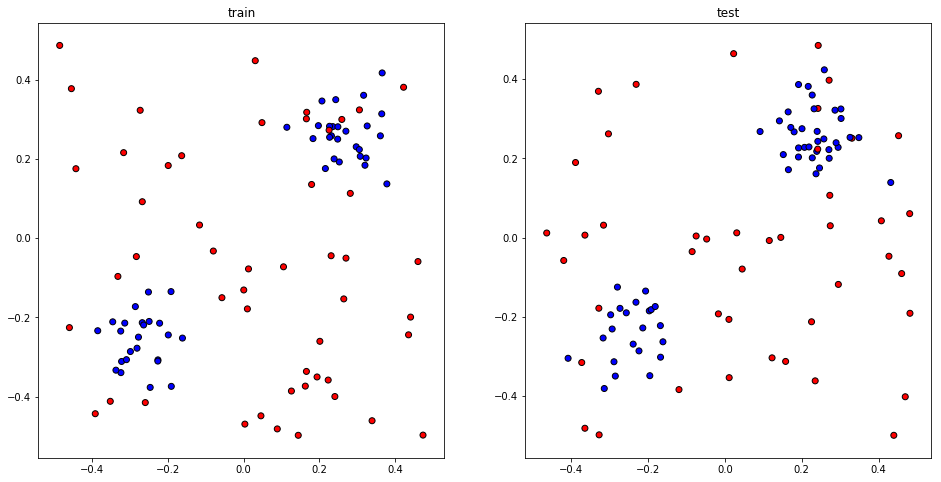

In [34]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# train / test split
n_train = 100
n_test = 100

X_train = X[:n_train]
Y_train = Y[:n_train]

X_test = X[n_train:(n_train + n_test)]
Y_test = Y[n_train:(n_train + n_test)]

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train')
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test')
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Implémentez un réseau de neurones sans couche cachée, qui prends en entrée $\mathbf{x} \in \mathbb{R}^2$ et produit une seule sortie $\mathbf{y} \in [0, 1]$ (sigmoid).

Multiplication de matrics: torch.matmul

Interdiction d'utiliser les modules haut niveau de pytorch ! (optim, nn etc.)

In [115]:
import numpy as np
from torch.autograd import Variable

torch.manual_seed(0)

n_in = 2
params = []

n_out = 1
W = Variable(torch.normal(torch.zeros(n_in, n_out), np.sqrt(2/(n_in + n_out))), requires_grad=True)
b = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    H  = torch.sigmoid(torch.mm(X,W)  + b)
    
    return H #O day H kha nang la ham sigmoid theo X, nhung con thieu W va b. Chac dung o tren

# Dung la ham sigmoid.

def L(H, Y, eps=1e-08):
    loss = sum(-Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps))  # log-likelikood

    return loss


n_epochs = 250
epoch_n_batches = 100
train_batch_size = 10
alpha = 0.1

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        #mb_idxs pour choisir aléatoirement train_batch_size éléments dans l'intervalle 0, n_train
        #afin de choisir aléatoirement un petit échantillon pour mini path
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = L(Y_prob_mb,Y_mb)
        loss.backward()
        W.data.sub_(alpha * W.grad.data)
        W.grad.data.zero_()  # must reset to 0 before next pass
    
        b.data.sub_(alpha * b.grad.data)
        b.grad.data.zero_()  # must reset to 0 before next pass

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))

Epoch 001	train loss=7.021829	test loss=67.705444	0/1 error=0.420
Epoch 002	train loss=6.870937	test loss=70.073250	0/1 error=0.620
Epoch 003	train loss=6.844877	test loss=66.558731	0/1 error=0.290
Epoch 004	train loss=6.899327	test loss=67.863380	0/1 error=0.370
Epoch 005	train loss=6.846813	test loss=66.623093	0/1 error=0.400
Epoch 006	train loss=6.869139	test loss=66.710007	0/1 error=0.320
Epoch 007	train loss=6.934757	test loss=68.696220	0/1 error=0.590
Epoch 008	train loss=6.886077	test loss=67.781403	0/1 error=0.380
Epoch 009	train loss=6.808216	test loss=66.499252	0/1 error=0.280
Epoch 010	train loss=6.928420	test loss=67.248566	0/1 error=0.400
Epoch 011	train loss=6.911923	test loss=71.929886	0/1 error=0.620
Epoch 012	train loss=6.902493	test loss=68.767815	0/1 error=0.590
Epoch 013	train loss=6.917811	test loss=68.455383	0/1 error=0.520
Epoch 014	train loss=6.763779	test loss=66.788750	0/1 error=0.310
Epoch 015	train loss=6.852124	test loss=67.330719	0/1 error=0.390
Epoch 016	

Epoch 128	train loss=6.786220	test loss=68.494308	0/1 error=0.470
Epoch 129	train loss=6.773308	test loss=67.730904	0/1 error=0.450
Epoch 130	train loss=6.759100	test loss=66.907120	0/1 error=0.340
Epoch 131	train loss=6.767057	test loss=66.709831	0/1 error=0.280
Epoch 132	train loss=6.921315	test loss=66.762352	0/1 error=0.310
Epoch 133	train loss=6.792761	test loss=66.443726	0/1 error=0.400
Epoch 134	train loss=6.745230	test loss=70.024887	0/1 error=0.590
Epoch 135	train loss=6.945704	test loss=67.908577	0/1 error=0.330
Epoch 136	train loss=6.865392	test loss=67.437424	0/1 error=0.380
Epoch 137	train loss=6.898041	test loss=67.289543	0/1 error=0.310
Epoch 138	train loss=6.916434	test loss=67.007141	0/1 error=0.310
Epoch 139	train loss=6.829764	test loss=67.400383	0/1 error=0.370
Epoch 140	train loss=6.881287	test loss=66.549759	0/1 error=0.310
Epoch 141	train loss=6.837719	test loss=66.798553	0/1 error=0.310
Epoch 142	train loss=6.868121	test loss=69.350899	0/1 error=0.550
Epoch 143	

Visualisez la distribution apprise par votre modèle:

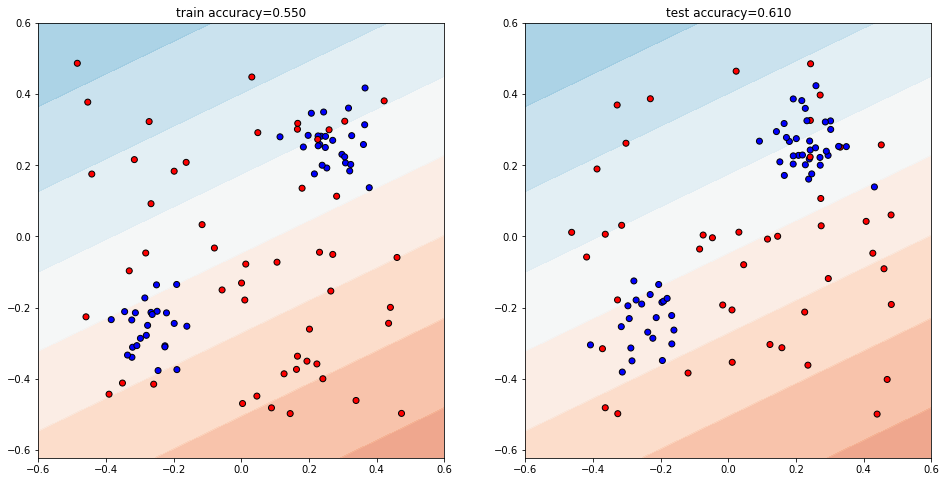

In [116]:
map_size = (100, 100)
x1, x2 = np.meshgrid(np.linspace(X_[:, 0].min()-0.1, X_[:, 0].max()+0.1, map_size[0]),
                     np.linspace(X_[:, 1].min()-0.1, X_[:, 1].max()+0.1, map_size[1]))
X_map = torch.from_numpy(np.asarray(np.c_[x1.ravel(), x2.ravel()], dtype='float32'))

Y_prob_map = forward(Variable(X_map)).data

Y_train_pred = (forward(Variable(X_train)).data > 0.5).type(torch.FloatTensor)
train_err = torch.abs(Y_train - Y_train_pred).mean()

Y_test_pred = (forward(Variable(X_test)).data > 0.5).type(torch.FloatTensor)
test_err = torch.abs(Y_test - Y_test_pred).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), squeeze=False)
axes[0, 0].set_title('train accuracy={:.03f}'.format(1 - train_err))
axes[0, 0].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 0].scatter(
    X_train[:, 0].numpy(),
    X_train[:, 1].numpy(),
    c=Y_train[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
axes[0, 1].set_title('test accuracy={:.03f}'.format(1 - test_err))
axes[0, 1].contourf(
    x1,
    x2,
    Y_prob_map.numpy().reshape(map_size),
    cmap=cm, vmin=0, vmax=1,
    alpha=.8)
axes[0, 1].scatter(
    X_test[:, 0].numpy(),
    X_test[:, 1].numpy(),
    c=Y_test[:, 0].numpy(),
    cmap=cm_bright,
    edgecolors='k')
plt.show()

Ajoutez une couche cachée de taille 10 à votre réseau de neurones, avec la fonction d'activation relu.

Bonus: améliorez votre réseau de neurones: plus de neurones cachés, deuxième couche cachée etc.

In [118]:
import numpy as np
from torch.autograd import Variable

torch.manual_seed(0)

n_in = 2
n_c1=10
params = []

n_out = 1
W1 = Variable(torch.normal(torch.zeros(n_in, n_c1), np.sqrt(2/(n_in + n_c1))), requires_grad=True)
b1 = Variable(torch.zeros(n_c1), requires_grad=True)
W2 = Variable(torch.normal(torch.zeros(n_c1, n_out), np.sqrt(2/(n_c1 + n_out))), requires_grad=True)
b2 = Variable(torch.zeros(n_out), requires_grad=True)

def forward(X):
    H1 = torch.sigmoid( torch.mm(X, W1)+b1)
    H2 = torch.sigmoid(torch.mm(H1, W2) + b2)
    
    return H2 

def L(H, Y, eps=1e-08):
    loss = sum(-Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps))  # log-likelikood

    return loss


n_epochs = 250
epoch_n_batches = 100
train_batch_size = 10
alpha = 0.1

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = L(Y_prob_mb,Y_mb)
        # loss la ham sum cua y_ilogf(x_i)+(1-y_i)log(1-f(x_i)) vay no la sum cua ham L(H,y_i)

        # Backward pass# 
        loss.backward()
        # Parameter update (gradient descent)
        W1.data.sub_(alpha * W1.grad.data)
        W1.grad.data.zero_()  # must reset to 0 before next pass
        W2.data.sub_(alpha * W2.grad.data)
        W2.grad.data.zero_()  # must reset to 0 before next pass
    
        b1.data.sub_(alpha * b1.grad.data)
        b1.grad.data.zero_()  # must reset to 0 before next pass

        b2.data.sub_(alpha * b2.grad.data)
        b2.grad.data.zero_()  # must reset to 0 before next pass

        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))







Epoch 001	train loss=7.085681	test loss=68.080780	0/1 error=0.440
Epoch 002	train loss=7.137445	test loss=75.204773	0/1 error=0.560
Epoch 003	train loss=6.998565	test loss=67.134903	0/1 error=0.350
Epoch 004	train loss=7.018527	test loss=66.529030	0/1 error=0.360
Epoch 005	train loss=6.964293	test loss=67.172211	0/1 error=0.390
Epoch 006	train loss=6.901138	test loss=65.989502	0/1 error=0.330
Epoch 007	train loss=6.840745	test loss=65.277061	0/1 error=0.310
Epoch 008	train loss=6.706254	test loss=63.840275	0/1 error=0.270
Epoch 009	train loss=6.446760	test loss=62.939594	0/1 error=0.280
Epoch 010	train loss=6.412170	test loss=61.825527	0/1 error=0.300
Epoch 011	train loss=6.165340	test loss=60.461178	0/1 error=0.310
Epoch 012	train loss=6.128836	test loss=59.994129	0/1 error=0.300
Epoch 013	train loss=5.925023	test loss=58.121315	0/1 error=0.290
Epoch 014	train loss=5.590721	test loss=57.194092	0/1 error=0.240
Epoch 015	train loss=5.654968	test loss=56.444901	0/1 error=0.250
Epoch 016	

Epoch 127	train loss=1.864976	test loss=33.121292	0/1 error=0.130
Epoch 128	train loss=1.863639	test loss=32.304848	0/1 error=0.120
Epoch 129	train loss=1.857699	test loss=32.017838	0/1 error=0.120
Epoch 130	train loss=2.126406	test loss=32.624653	0/1 error=0.130
Epoch 131	train loss=1.941092	test loss=31.630001	0/1 error=0.120
Epoch 132	train loss=1.868650	test loss=33.390587	0/1 error=0.130
Epoch 133	train loss=1.893374	test loss=32.694763	0/1 error=0.130
Epoch 134	train loss=1.872073	test loss=32.453651	0/1 error=0.120
Epoch 135	train loss=2.081007	test loss=33.486637	0/1 error=0.130
Epoch 136	train loss=2.020648	test loss=34.606762	0/1 error=0.130
Epoch 137	train loss=1.935870	test loss=32.476795	0/1 error=0.120
Epoch 138	train loss=1.972053	test loss=33.123211	0/1 error=0.120
Epoch 139	train loss=1.913655	test loss=32.530151	0/1 error=0.140
Epoch 140	train loss=1.984174	test loss=35.121758	0/1 error=0.130
Epoch 141	train loss=1.928642	test loss=32.228767	0/1 error=0.130
Epoch 142	

In [119]:
import numpy as np
from torch.autograd import Variable

torch.manual_seed(0)

n_in = 2
n_c1=10
n_c2=10
params = []

n_out = 1
W1 = Variable(torch.normal(torch.zeros(n_in, n_c1), np.sqrt(2/(n_in + n_c1))), requires_grad=True)
b1 = Variable(torch.zeros(n_c1), requires_grad=True)
W2 = Variable(torch.normal(torch.zeros(n_c1, n_c2), np.sqrt(2/(n_c1 + n_c2))), requires_grad=True)
b2 = Variable(torch.zeros(n_c2), requires_grad=True)
W3 = Variable(torch.normal(torch.zeros(n_c2, n_out), np.sqrt(2/(n_c2 + n_out))), requires_grad=True)
b3 = Variable(torch.zeros(n_out), requires_grad=True)


def forward(X):
    H1 = torch.sigmoid( torch.mm(X, W1)+b1)
    H2 = torch.sigmoid(torch.mm(H1, W2) + b2)
    H3 = torch.sigmoid(torch.mm(H2, W3) + b3)
    return H3 

def L(H, Y, eps=1e-08):
    loss = sum (-Y * torch.log(H + eps) - (1 - Y) * torch.log(1 - H + eps))  # log-likelikood

    return loss


n_epochs = 250
epoch_n_batches = 100
train_batch_size = 10
alpha = 0.1

for i in range(n_epochs):

    train_loss = 0.

    for j in range(epoch_n_batches):

        # Prepare next mini-batch
        mb_idxs = torch.multinomial(torch.ones(n_train), train_batch_size, replacement=True)
        X_mb = Variable(X_train[mb_idxs])
        Y_mb = Variable(Y_train[mb_idxs])

        # Forward pass
        Y_prob_mb = forward(X_mb)
        
        loss = L(Y_prob_mb,Y_mb)
        loss.backward()
        W1.data.sub_(alpha * W1.grad.data)
        W1.grad.data.zero_()  # must reset to 0 before next pass
        W2.data.sub_(alpha * W2.grad.data)
        W2.grad.data.zero_()  # must reset to 0 before next pass
        W3.data.sub_(alpha * W3.grad.data)
        W3.grad.data.zero_()  # must reset to 0 before next pass
    
        b1.data.sub_(alpha * b1.grad.data)
        b1.grad.data.zero_()  # must reset to 0 before next pass

        b2.data.sub_(alpha * b2.grad.data)
        b2.grad.data.zero_()  # must reset to 0 before next pass
        b3.data.sub_(alpha * b3.grad.data)
        b3.grad.data.zero_()  # must reset to 0 before next pass
        train_loss += loss.data[0]

    train_loss /= epoch_n_batches

    # Forward pass
    Y_test_prob = forward(Variable(X_test)).data
    test_loss = L(Y_test_prob, Y_test).mean()
    
    # Compute expected 0/1 error
    Y_test_pred = (Y_test_prob > 0.5).type(torch.FloatTensor)
    test_err = torch.abs(Y_test - Y_test_pred).mean()

    print('Epoch {:03d}\ttrain loss={:.06f}\ttest loss={:.06f}\t0/1 error={:.03f}'.format(
        i + 1, train_loss, test_loss, test_err))


Epoch 001	train loss=7.165280	test loss=71.115273	0/1 error=0.560
Epoch 002	train loss=7.077521	test loss=68.944969	0/1 error=0.440
Epoch 003	train loss=7.036386	test loss=73.795151	0/1 error=0.560
Epoch 004	train loss=7.071702	test loss=69.782578	0/1 error=0.560
Epoch 005	train loss=7.001674	test loss=70.338058	0/1 error=0.560
Epoch 006	train loss=7.006515	test loss=68.816467	0/1 error=0.440
Epoch 007	train loss=7.037956	test loss=69.403511	0/1 error=0.570
Epoch 008	train loss=7.009235	test loss=72.605057	0/1 error=0.560
Epoch 009	train loss=6.997608	test loss=68.534538	0/1 error=0.440
Epoch 010	train loss=7.008840	test loss=68.850983	0/1 error=0.500
Epoch 011	train loss=6.978603	test loss=69.111938	0/1 error=0.330
Epoch 012	train loss=7.022204	test loss=70.101578	0/1 error=0.560
Epoch 013	train loss=6.978000	test loss=68.487267	0/1 error=0.440
Epoch 014	train loss=6.948717	test loss=68.334755	0/1 error=0.510
Epoch 015	train loss=6.945141	test loss=71.111855	0/1 error=0.560
Epoch 016	

Epoch 126	train loss=1.542956	test loss=35.897312	0/1 error=0.110
Epoch 127	train loss=1.607775	test loss=36.150711	0/1 error=0.100
Epoch 128	train loss=1.444830	test loss=34.638954	0/1 error=0.110
Epoch 129	train loss=1.538648	test loss=34.481358	0/1 error=0.120
Epoch 130	train loss=1.591230	test loss=40.353527	0/1 error=0.200
Epoch 131	train loss=1.500449	test loss=36.445984	0/1 error=0.150
Epoch 132	train loss=1.430295	test loss=39.328136	0/1 error=0.140
Epoch 133	train loss=1.351036	test loss=36.705730	0/1 error=0.150
Epoch 134	train loss=1.435288	test loss=38.326534	0/1 error=0.120
Epoch 135	train loss=1.559616	test loss=36.303810	0/1 error=0.140
Epoch 136	train loss=1.444457	test loss=35.911396	0/1 error=0.110
Epoch 137	train loss=1.510888	test loss=34.348396	0/1 error=0.090
Epoch 138	train loss=1.525154	test loss=39.250286	0/1 error=0.200
Epoch 139	train loss=1.571530	test loss=37.106792	0/1 error=0.100
Epoch 140	train loss=1.528247	test loss=37.628849	0/1 error=0.120
Epoch 141	

# MNIST

Vous allez maintenant utiliser les fonctions haut niveau de pytorch: torch.nn, torch.optim etc.

On commence par charger les données:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torchvision import datasets, transforms

mnist_folder = '!/MNIST_data/'

train_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=True)
test_data = datasets.MNIST(root=mnist_folder, download=True, transform=transforms.ToTensor(), train=False)

In [2]:
print("Nombre d'images dans le train set:", len(train_data))
print("Nombre d'images dans le train set:", len(test_data))

Nombre d'images dans le train set: 60000
Nombre d'images dans le train set: 10000


### Afficher quelques images

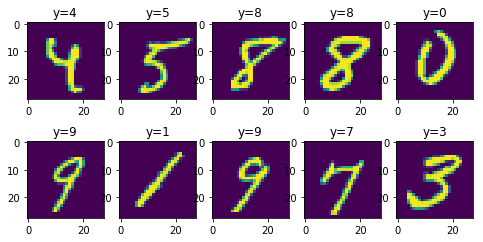

In [125]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(8, 4), squeeze=False)
seed = 123 # changer la seed pour afficher d'autres images

for i in range(10):
    r = i // 5
    c = i % 5
    np.random.seed(seed+i)
    idx = np.random.choice(len(train_data), 1)[0]
    x = train_data[idx][0].numpy()
    y = train_data[idx][1]
    axes[r, c].imshow(x[0, :, :])
    axes[r, c].set_title('y={}'.format(y))
    
plt.show()

### Modèle initial

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader

# Training settings
seed = 1337
lr = 0.2
epochs = 25
train_batch_size = 25
test_batch_size = 100

torch.manual_seed(seed)

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 10)

    def forward(self, X):
        X = X.view(-1, 28*28)  # flatten images
        X = self.fc1(X)
        return F.log_softmax(X)

model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr)

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)

        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        
        # Backward pass
        loss.backward()
        
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()

        # exp_loss.data[0] += loss * X.data.shape[0]
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error


for epoch in range(1, epochs + 1):
    
    print('Epoch {}...'.format(epoch))
    
    train_loss = train(epoch)
    print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    
    test_loss, test_error = test()
    print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))


Epoch 1...


/Users/NhatMinh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train negative log-likelihood: 0.368019
Test  negative log-likelihood: 0.294447 0/1 error: 0.083300
Epoch 2...
Train negative log-likelihood: 0.301837
Test  negative log-likelihood: 0.286049 0/1 error: 0.081200
Epoch 3...
Train negative log-likelihood: 0.289908
Test  negative log-likelihood: 0.282798 0/1 error: 0.078600
Epoch 4...
Train negative log-likelihood: 0.283505
Test  negative log-likelihood: 0.290526 0/1 error: 0.080500
Epoch 5...
Train negative log-likelihood: 0.278865
Test  negative log-likelihood: 0.274886 0/1 error: 0.075400
Epoch 6...
Train negative log-likelihood: 0.276089
Test  negative log-likelihood: 0.284389 0/1 error: 0.082400
Epoch 7...
Train negative log-likelihood: 0.272958
Test  negative log-likelihood: 0.285296 0/1 error: 0.081000
Epoch 8...
Train negative log-likelihood: 0.269966
Test  negative log-likelihood: 0.272259 0/1 error: 0.075700
Epoch 9...
Train negative log-likelihood: 0.268882
Test  negative log-likelihood: 0.283950 0/1 error: 0.076400
Epoch 10...


Jouez avec les paramètres suivants:
- lr
- epochs
- train_batch_size

Quelle est la meilleure performance (0/1 error) que vous arrivez à atteindre?

Le meilleur score que j'obtient est 0.0751 avec lr=0.2, epochs=25, train_batch_size=50
J'ai monté epochs jusqu'à 100 mais le résultat ne s'améliore pas. Il faut donc changer la méthode pour espérér un meilleur résultat

## Améliorez votre modèle

Améliorez votre modèle afin de diminuer l'erreur sur le jeu de test. Essayez différentes architectures / hyperparamètres et à chaque fois reportez vos résultats.

Objectif: passer sous les 1% d'erreur: http://yann.lecun.com/exdb/mnist/

Pistes à essayer:
- plus de couches cachées
- convolutions + max pooling
- dropout
- couches résiduelles

Astuces:
- changer l'algorithme de descente de gradient (Adam)
- implémentez une stratégie d'early stopping: $n$ epochs sans amélioration -> arret
- implémentez une stratégie de diminution du learning rate: $n/2$ epochs sans amélioration -> $\alpha = \alpha / 2$ (torch.optim.lr_scheduler.ReduceLROnPlateau)

In [23]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
t_s=time.time()
# Training settings
seed = 1337
lr = 1
epochs = 5
train_batch_size = 25
test_batch_size = 100




torch.manual_seed(seed)

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)




class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 120)# On utilise ici un NN avec 3 couche, donc, 2 couches cachées de dimension 
        self.fc2 = nn.Linear(120, 80)# correspondance de (28*28, 120) et (120,84)
        self.fc3 = nn.Linear(80, 10)

    def forward(self, X):
        X = X.view(-1, 28*28)
        X = self.fc1(X)
        X= F.log_softmax(X)
        X = self.fc2(X)
        X = F.log_softmax(X)
        X = self.fc3(X)
        return F.log_softmax(X)
        
model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr)

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)

        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        
        # Backward pass
        loss.backward()
        
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()

        # exp_loss.data[0] += loss * X.data.shape[0]
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error


for epoch in range(1, epochs + 1):
    
    print('Epoch {}...'.format(epoch))
    
    train_loss = train(epoch)
    print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    
    test_loss, test_error = test()
    print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))

t_end=time.time()
print("Time", t_end-t_s)

Epoch 1...


/Users/NhatMinh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/Users/NhatMinh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
/Users/NhatMinh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train negative log-likelihood: nan
Test  negative log-likelihood: nan 0/1 error: 0.902000
Epoch 2...
Train negative log-likelihood: nan
Test  negative log-likelihood: nan 0/1 error: 0.902000
Epoch 3...
Train negative log-likelihood: nan
Test  negative log-likelihood: nan 0/1 error: 0.902000
Epoch 4...
Train negative log-likelihood: nan
Test  negative log-likelihood: nan 0/1 error: 0.902000
Epoch 5...
Train negative log-likelihood: nan
Test  negative log-likelihood: nan 0/1 error: 0.902000
Time 49.08213496208191


In [ ]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
t_s=time.time()
# Training settings
seed = 1337
lr = 0.1
epochs = 10
train_batch_size = 25
test_batch_size = 100




torch.manual_seed(seed)

train_loader = DataLoader(train_data, batch_size=train_batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_batch_size, shuffle=False)


from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

model = Net()

optimizer = optim.SGD(model.parameters(), lr=lr)

def train(epoch):

    exp_loss = 0.
    n_processed = 0

    model.train()
    for X, Y in train_loader:
        X, Y = Variable(X), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)

        # Compute expected loss
        loss = F.nll_loss(Y_pred_prob, Y)
        
        # Backward pass
        loss.backward()
        
        # Parameter update (gradient descent)
        optimizer.step()
        optimizer.zero_grad()

        # exp_loss.data[0] += loss * X.data.shape[0]
        exp_loss += loss * X.data.shape[0]
        n_processed += X.data.shape[0]
    
    exp_loss /= n_processed
    return exp_loss

def test():
    test_loss = 0
    test_error = 0
    
    model.eval()
    for X, Y in test_loader:
        X, Y = Variable(X, volatile=True), Variable(Y)
        
        # Forward pass
        Y_pred_prob = model(X)
        
        # Compute the expected negative log-likelihood
        test_loss += F.nll_loss(Y_pred_prob, Y, size_average=False).data[0]
        
        # Get the mode of p(y|x) (most probable digit)
        Y_pred = Y_pred_prob.data.max(1, keepdim=True)[1]
        
        # Compute the expected 0/1 error
        test_error += (1 - Y_pred.eq(Y.data.view_as(Y_pred))).sum()

    test_loss /= len(test_loader.dataset)
    test_error /= len(test_loader.dataset)

    return test_loss, test_error


for epoch in range(1, epochs + 1):
    
    print('Epoch {}...'.format(epoch))
    
    train_loss = train(epoch)
    print('Train negative log-likelihood: {:.6f}'.format(train_loss.data[0]))
    
    test_loss, test_error = test()
    print('Test  negative log-likelihood: {:.6f} 0/1 error: {:.6f}'.format(test_loss, test_error))

t_end=time.time()
print("Time", t_end-t_s)#cette méthode tourne bien, nous avons donc une erreur de moins de 2% avec 10 epochs, 
#si on utilise 25 epochs, je pense qu'on peut arriver à un résultat de 1% un peu près.

Epoch 1...
Train negative log-likelihood: 0.506679
Test  negative log-likelihood: 0.082159 0/1 error: 0.025100
Epoch 2...
Train negative log-likelihood: 0.248509
Test  negative log-likelihood: 0.060899 0/1 error: 0.020800
Epoch 3...
Train negative log-likelihood: 0.206382
Test  negative log-likelihood: 0.057975 0/1 error: 0.018100
Epoch 4...
Train negative log-likelihood: 0.191437
Test  negative log-likelihood: 0.051360 0/1 error: 0.016700
Epoch 5...
Train negative log-likelihood: 0.176884
Test  negative log-likelihood: 0.045304 0/1 error: 0.014300
Epoch 6...
Train negative log-likelihood: 0.172587
Test  negative log-likelihood: 0.062649 0/1 error: 0.018000
Epoch 7...
Train negative log-likelihood: 0.165201
Test  negative log-likelihood: 0.063225 0/1 error: 0.017300
Epoch 8...


#### Dans le résultat précédent on peut espérer à avoir une erreur de 1% environs en augementant la taille de epoch(50, par exemple)  et la taille de training_batch_size(=50, par exemple. Là, je suis sur mon PC personnel et cela tournera mal avec les paramètres unpeu plus élévé)

## NLP: N-Gram Language Modeling

Modèle NGram: sachant les mots $n$ précédents on veut prédire le prochain mot:

\begin{equation*}
P(w_i | w_{i-1}, w_{i-2}, \dots, w_{i-n+1})
\end{equation*}

Où $w_i$ est le ième mot d'une phrase.

Veuillez considérer de modèle de prédiction de trigram suivant :

In [2]:
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
t_s=time.time()
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10
# We will use Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()
# we should tokenize the input, but we will ignore that for now
# build a list of tuples.  Each tuple is ([ word_i-2, word_i-1 ], target word)
trigrams = [([test_sentence[i], test_sentence[i + 1]], test_sentence[i + 2])
            for i in range(len(test_sentence) - 2)]
# print the first 3, just so you can see what they look like
print(trigrams[:3])

vocab = set(test_sentence)
word_to_ix = {word: i for i, word in enumerate(vocab)}


class NGramLanguageModeler(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLanguageModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs


losses = []
loss_function = nn.NLLLoss()
model = NGramLanguageModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    total_loss = torch.Tensor([0])
    for context, target in trigrams:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in variables)
        context_idxs = [word_to_ix[w] for w in context]
        context_var = Variable(torch.LongTensor(context_idxs))

        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_var)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a variable)
        loss = loss_function(log_probs, Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        total_loss += loss.data
    losses.append(total_loss)
print(losses)  # The loss decreased every iteration over the training data!

[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]


/Users/NhatMinh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[
 525.0787
[torch.FloatTensor of size 1]
, 
 501.3724
[torch.FloatTensor of size 1]
, 
 478.8521
[torch.FloatTensor of size 1]
, 
 456.7795
[torch.FloatTensor of size 1]
, 
 434.5869
[torch.FloatTensor of size 1]
, 
 411.8039
[torch.FloatTensor of size 1]
, 
 388.1391
[torch.FloatTensor of size 1]
, 
 363.4603
[torch.FloatTensor of size 1]
, 
 337.8178
[torch.FloatTensor of size 1]
, 
 311.3845
[torch.FloatTensor of size 1]
, 
 284.3995
[torch.FloatTensor of size 1]
, 
 257.2635
[torch.FloatTensor of size 1]
, 
 230.3702
[torch.FloatTensor of size 1]
, 
 204.2893
[torch.FloatTensor of size 1]
, 
 179.5183
[torch.FloatTensor of size 1]
, 
 156.5714
[torch.FloatTensor of size 1]
, 
 135.7663
[torch.FloatTensor of size 1]
, 
 117.3949
[torch.FloatTensor of size 1]
, 
 101.3916
[torch.FloatTensor of size 1]
, 
 87.6958
[torch.FloatTensor of size 1]
, 
 76.1037
[torch.FloatTensor of size 1]
, 
 66.3585
[torch.FloatTensor of size 1]
, 
 58.2123
[torch.FloatTensor of size 1]
, 
 51.4513
[tor

### Utilisez vos propres valeurs pour context

In [5]:
context = ['to', 'be']
context_idxs = [word_to_ix[w] for w in context]
context_var = Variable(torch.LongTensor(context_idxs))
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['to', 'be'] new


/Users/NhatMinh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [9]:
context = ['How', 'much']
context_idxs = [word_to_ix[w] for w in context]
context_var = Variable(torch.LongTensor(context_idxs))
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['How', 'much'] more


/Users/NhatMinh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [7]:
context = ['This', 'child']
context_idxs = [word_to_ix[w] for w in context]
context_var = Variable(torch.LongTensor(context_idxs))
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])# il peut trouver la meilleure solution 
# meme quand ces 2 mots là ne sont pas consécutifs dans le texte original.

['This', 'child'] of


/Users/NhatMinh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


## CBOW: Continuous Bag-of-Words
CBOW = Prédire un mot sachant les mots d'avant et les mots d'après.

Exercice : en utilisant l'exemple précédent, codez un modèle CBOW.

In [15]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    tensor = torch.LongTensor(idxs)
    return Variable(tensor)

CONTEXT_SIZE = 4  # 2 words to the left, 2 to the right
EMBEDDING_DIM = 10
raw_text = """We are about to study the idea of a computational process.
Computational processes are abstract beings that inhabit computers.
As they evolve, processes manipulate other abstract things called data.
The evolution of a process is directed by a pattern of rules
called a program. People create programs to direct processes. In effect,
we conjure the spirits of the computer with our spells.""".split()

# By deriving a set from `raw_text`, we deduplicate the array
vocab = set(raw_text)
vocab_size = len(vocab)

word_to_ix = {word: i for i, word in enumerate(vocab)}
data = []
for i in range(2, len(raw_text) - 2):
    context = [raw_text[i - 2], raw_text[i - 1],
               raw_text[i + 1], raw_text[i + 2]]
    target = raw_text[i]
    data.append((context, target))
print(data[:5])

#class CBOW(nn.Module):

 #   def __init__(self):
 #       pass

  #  def forward(self, inputs):
  #      pass
class CBOW(nn.Module):

    def __init__(self, vocab_size, embedding_dim, context_size):
        super(CBOW, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1, -1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out)
        return log_probs


losses = []
loss_function = nn.NLLLoss()
model = CBOW(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range((300):
    total_loss = torch.Tensor([0])
    for context, target in data:

        # Step 1. Prepare the inputs to be passed to the model (i.e, turn the words
        # into integer indices and wrap them in variables)
        context_var = make_context_vector(context, word_to_ix)
        # Step 2. Recall that torch *accumulates* gradients. Before passing in a
        # new instance, you need to zero out the gradients from the old
        # instance
        model.zero_grad()

        # Step 3. Run the forward pass, getting log probabilities over next
        # words
        log_probs = model(context_var)

        # Step 4. Compute your loss function. (Again, Torch wants the target
        # word wrapped in a variable)
        loss = loss_function(log_probs, Variable(
            torch.LongTensor([word_to_ix[target]])))

        # Step 5. Do the backward pass and update the gradient
        loss.backward()
        optimizer.step()

        total_loss += loss.data
    losses.append(total_loss)
print(losses)  # The loss decreased every iteration over the training data!
#là, nous avons une erreur très très petite...

[(['We', 'are', 'to', 'study'], 'about'), (['are', 'about', 'study', 'the'], 'to'), (['about', 'to', 'the', 'idea'], 'study'), (['to', 'study', 'idea', 'of'], 'the'), (['study', 'the', 'of', 'a'], 'idea')]


/Users/NhatMinh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


[
 228.5765
[torch.FloatTensor of size 1]
, 
 214.6649
[torch.FloatTensor of size 1]
, 
 201.2470
[torch.FloatTensor of size 1]
, 
 187.9053
[torch.FloatTensor of size 1]
, 
 174.3643
[torch.FloatTensor of size 1]
, 
 160.5009
[torch.FloatTensor of size 1]
, 
 146.3137
[torch.FloatTensor of size 1]
, 
 131.9731
[torch.FloatTensor of size 1]
, 
 117.6527
[torch.FloatTensor of size 1]
, 
 103.7487
[torch.FloatTensor of size 1]
, 
 90.3668
[torch.FloatTensor of size 1]
, 
 77.8214
[torch.FloatTensor of size 1]
, 
 66.2478
[torch.FloatTensor of size 1]
, 
 55.8415
[torch.FloatTensor of size 1]
, 
 46.7199
[torch.FloatTensor of size 1]
, 
 38.9198
[torch.FloatTensor of size 1]
, 
 32.3991
[torch.FloatTensor of size 1]
, 
 27.0613
[torch.FloatTensor of size 1]
, 
 22.7481
[torch.FloatTensor of size 1]
, 
 19.2720
[torch.FloatTensor of size 1]
, 
 16.5084
[torch.FloatTensor of size 1]
, 
 14.2815
[torch.FloatTensor of size 1]
, 
 12.4933
[torch.FloatTensor of size 1]
, 
 11.0366
[torch.FloatT

In [17]:
context = ['processes', 'manipulate', 'abstract', 'things']# We expect to see 'other'
context_var = make_context_vector(context, word_to_ix)
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['processes', 'manipulate', 'abstract', 'things'] other


/Users/NhatMinh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [18]:
context = ['People', 'create',  'to', 'direct']# We expect to see 'programs'
context_var = make_context_vector(context, word_to_ix)
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['People', 'create', 'to', 'direct'] programs


/Users/NhatMinh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [19]:
context = ['Computational', 'processes',  'beings', 'that']# there are 'are' and 'abstract' between these words.
context_var = make_context_vector(context, word_to_ix)
log_probs = model(context_var)
print(context, list(vocab)[torch.max(log_probs, 1)[1].data[0]])

['Computational', 'processes', 'beings', 'that'] abstract


/Users/NhatMinh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:47: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
